In [2]:
import numpy as np
import tensornetwork as tn
import matplotlib.pyplot as plt

In [3]:
def show_graph(*nodes):
    graph = tn.to_graphviz(nodes)

    graph_image = graph.render(format='png', cleanup=True)
    plt.imshow(plt.imread(graph_image))
    plt.axis('off')
    plt.show()

In [4]:
CX = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
]).astype(np.complex128).reshape(2, 2, 2, 2)
CX.shape

(2, 2, 2, 2)

In [5]:
Original = tn.Node(CX, name='Original', axis_names=['a_in', 'b_in', 'a_out', 'b_out'])

In [6]:
A, B, _ = tn.split_node(Original,
                                    [Original['a_in'], Original['a_out']],
                                    [Original['b_in'], Original['b_out']],
                                    left_name='A', right_name='B',
                                    )
A.tensor.shape, B.tensor.shape

((2, 2, 4), (4, 2, 2))

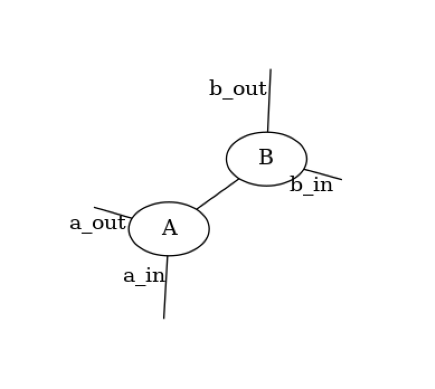

In [7]:
show_graph(A, B)

In [8]:
Transform = tn.Node(CX, name='Transform', axis_names=['a_in', 'b_in', 'a_out', 'b_out'])
tA, tB, _ = tn.split_node(Transform,
                                    [Transform['a_in'], Transform['a_out']],
                                    [Transform['b_in'], Transform['b_out']],
                                    left_name='tA', right_name='tB',
                                    )
tA.tensor.shape, tB.tensor.shape

((2, 2, 4), (4, 2, 2))

In [9]:
e1 = A[1] ^ tA[0]
e2 = B[2] ^ tB[1]

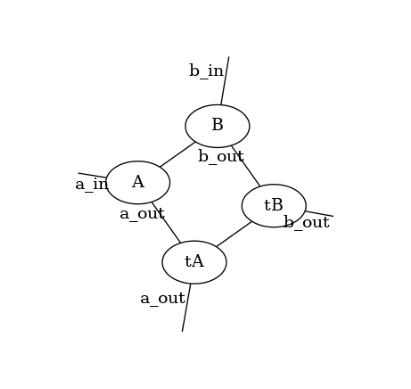

In [10]:
show_graph(A, B, tA, tB)

In [11]:
cA = tn.contract(e1, name='cA', axis_names=['a_i', 'a_o', "int1", "int2"])
cB = tn.contract(e2, name='cB', axis_names=['b_i', 'b_o', "int1", "int2"])

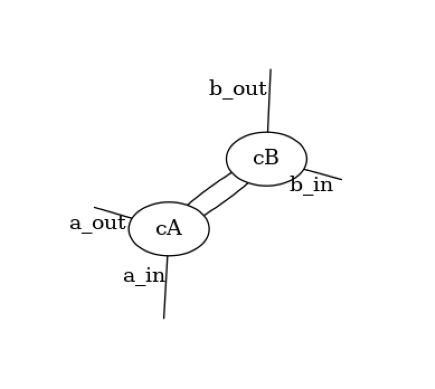

In [12]:
show_graph(cA, cB)

In [13]:
print(cA[0].name, cA[2].name, cB[1].name, cB[3].name)
T = tn.contractors.auto([cA, cB], output_edge_order=[cA[0], cA[2], cB[1], cB[3]])
T.tensor.shape

a_in a_out b_in b_out


(2, 2, 2, 2)

In [17]:
# random 3dim tensor
T = tn.Node(np.random.rand(2, 2, 2))
tn.contract(T[0] ^ T[2])

Node
(
name : '__unnamed_node__',
tensor : 
array([0.60432144, 1.41349367]),
edges : 
[
Edge(Dangling Edge)[0] 
] 
)